In [37]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
#read json file
reviews=[]
with open('reviews.json') as f:
    for line in f:
        reviews.append(json.loads(line))
reviews = reviews[0]

#make a list of the reviews
review_num = len(reviews['Id'])
corpus = list()
labels = list()
for i in range(review_num):
    corpus.append(reviews['clean'][str(i)])
    labels.append(reviews['Score'][str(i)])
    
stop_words = ['<', '>', 'br']

In [122]:
#def functions

def svd(data_mat, components):
    svd = TruncatedSVD(n_components=components, n_iter=10)
    svd_mat = svd.fit_transform(data_mat)
    y = np.zeros([components])
    total = 0
    count = 0
    for i in svd.explained_variance_ratio_:
        y[count] = i + total
        count = count + 1
        total = total + i
    plt.figure()
    plt.scatter(range(components), y)
    plt.title("Percent Variance Explained")
    return svd_mat

def split_into_test_and_train(data_mat, labels, training_ind):
    #separate into testing and training
    training = data_mat[0:training_ind]
    training_labels = labels[0:training_ind]
    testing = data_mat[training_ind+1:review_num-1]
    testing_labels = labels[training_ind+1:review_num-1]
#     print("checking train and test shapes")
#     print(training.shape)
#     print(len(training_labels))
#     print(testing.shape)
#     print(len(testing_labels))
    return training, training_labels, testing, testing_labels

def train_lin_reg(training_data, train_labels, testing_data, test_labels):
    reg = LinearRegression()
    reg.fit(training_data, train_labels)
    predictions = reg.predict(testing_data)
    predictions = np.array(predictions)
    predictions[predictions<1] = 1
    predictions[predictions>5] = 5
    predictions_rounded = np.round(predictions)
    predictions_rounded = predictions_rounded.astype(int)
    return predictions_rounded, predictions

def show_accuracy(test_labels, preds_rounded):
    testing_labels_arr = np.array(test_labels)
    correct = sum((testing_labels_arr == preds_rounded))
    acc = correct/len(testing_labels_arr)
    return acc
    
def root_mean_sq_error(preds, test_labels):
    rmse = mean_squared_error(test_labels, preds, squared=False)
    return rmse

def metrics(preds, test_labels, verbose_flag):
    acc = show_accuracy(test_labs, predictions_rounded)
    cm = confusion_matrix(test_labs, predictions_rounded)
    disp = ConfusionMatrixDisplay(cm, display_labels = cm_labels)
    precision = precision_score(test_labs, predictions_rounded, average = 'weighted')
    recall = recall_score(test_labs, predictions_rounded, average = 'weighted')
    rmse = root_mean_sq_error(predictions, test_labs)
    if verbose_flag:
        print("accuracy: " + str(acc))
        print("root mean squared error: " + str(rmse))
        print('Recall2: %.3f' % recall)
        print('Precision2: %.3f' % precision)
        print("\n")
    return(acc, rmse, precision, recall, disp)

In [6]:
# count vectorize
vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), max_df=0.99, min_df=0.01)
X = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names()
spar_mat_count = csr_matrix(X.toarray())
print("Len vocab")
print(len(vocab))

# td idf
trans = TfidfTransformer()
X_tf = trans.fit_transform(X)
spar_mat_tf = csr_matrix(X_tf.toarray())



Len vocab
607


Count vectorizer
dimensions: 25
Accuracy: 0.2964851282650616
Precision2: 0.603
Recall2: 0.296
root mean squared error: 1.199729893506046


tf-idf vectors
dimensions: 25
Accuracy: 0.33360603050312626
Precision2: 0.590
Recall2: 0.334
root mean squared error: 1.170393881050109


Count vectorizer
dimensions: 50


/Users/nicholasornstein/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3107432945713785
Precision2: 0.617
Recall2: 0.311
root mean squared error: 1.1806539698102034


tf-idf vectors
dimensions: 50
Accuracy: 0.37662887863028105
Precision2: 0.604


/Users/nicholasornstein/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall2: 0.377
root mean squared error: 1.1203812719477388


Count vectorizer
dimensions: 100
Accuracy: 0.33908432186057386
Precision2: 0.623
Recall2: 0.339
root mean squared error: 1.141864028435009


tf-idf vectors
dimensions: 100
Accuracy: 0.39953544089288845
Precision2: 0.686
Recall2: 0.400
root mean squared error: 1.081415836956122


Count vectorizer
dimensions: 200
Accuracy: 0.3629404546251388
Precision2: 0.644
Recall2: 0.363
root mean squared error: 1.1078413058528003


tf-idf vectors
dimensions: 200
Accuracy: 0.4126102962659966
Precision2: 0.675
Recall2: 0.413
root mean squared error: 1.0589064199871865


Count vectorizer
dimensions: 300
Accuracy: 0.37753462280137906
Precision2: 0.651
Recall2: 0.378
root mean squared error: 1.08414566300971


tf-idf vectors
dimensions: 300
Accuracy: 0.42822707882896044
Precision2: 0.682
Recall2: 0.428
root mean squared error: 1.0390037368267124




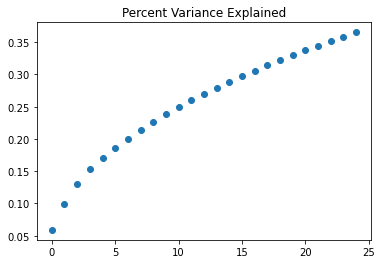

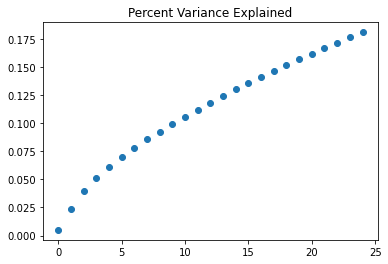

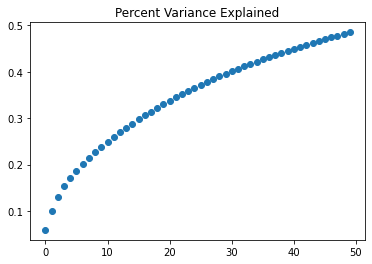

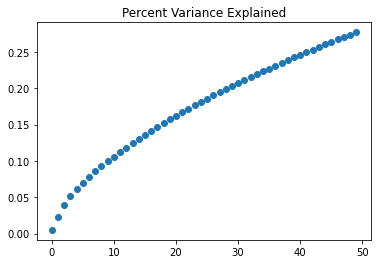

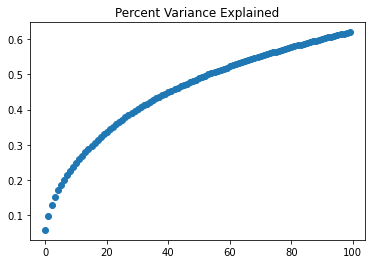

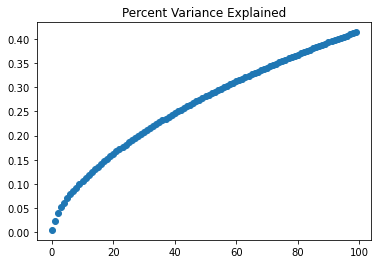

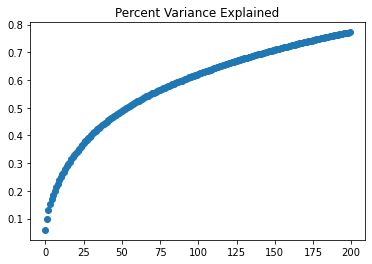

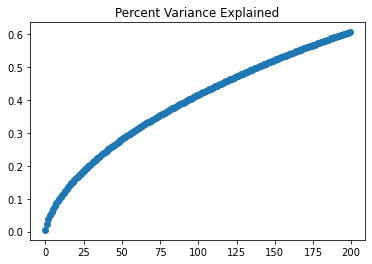

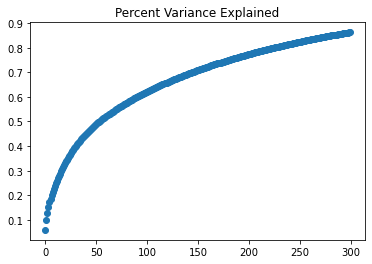

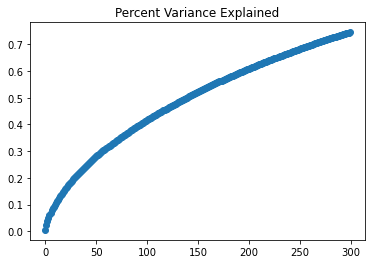

In [143]:
# process 


components = [25, 50, 100, 200, 300]
precisions = np.zeros([2, len(components_num)])
recalls = np.zeros([2, len(components_num)])
rmses = np.zeros([2, len(components_num)])
accuracies = np.zeros([2, len(components_num)])
confusion_mats = [list(), list()]

scores = {"precisions":precisions, 
          "recalls": recalls, 
          "rmses":rmses,
          "accuracies": accuracies,
          "confusion_mats": confusion_mats
         }

cm_labels = ['1', '2', '3', '4', '5']
scores["predictions_rounded"] = [list(), list()]

for j in range(len(components)):
    training_ind = 500000
    models = [spar_mat_count, spar_mat_tf]
    name = ["Count vectorizer", "tf-idf vectors"]
    for i in range(len(models)):
        print(name[i])
        print("dimensions: " +  str(components[j]))
        svd_mat = svd(models[i], components[j])
        train, train_labs, test, test_labs = split_into_test_and_train(svd_mat, labels, training_ind)
        predictions_rounded, predictions = train_lin_reg(train, train_labs, test, test_labs)
        scores["predictions_rounded"][i].append(predictions_rounded)
        acc, rmse, precision, recall, disp  = metrics(predictions_rounded, test_labs)
        scores["recalls"][i,j] = recall
        scores["precisions"][i,j] = precision
        scores["accuracies"][i,j] = acc
        scores["rmses"][i,j] =  rmse
        scores["confusion_mats"][i].append(disp)
        
              
              
              

[52268, 29769, 42640, 80655, 363122]
Accuracy: 0.42260269970198094
Precision2: 0.456
Recall2: 0.423
root mean squared error: 1.8833393793749753


Accuracy: 0.647460994565535
Precision2: 0.419
Recall2: 0.647
root mean squared error: 1.5145142082446155




/Users/nicholasornstein/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


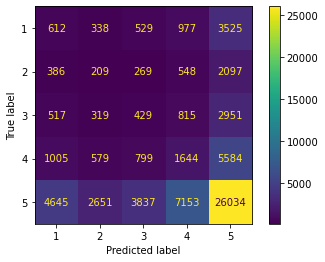

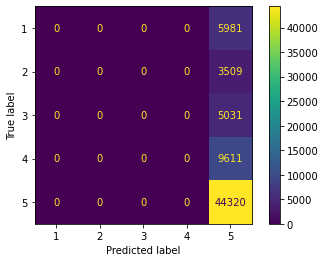

In [144]:
# random frequency guesses

#MAKE RANDOM SHUFFLE OF GUESSES AT TRAINING FREQUENCY


frequencies = [0,0,0,0,0]
for i in labels:
    frequencies[i-1]+=1
print(frequencies)
guess_num = review_num - training_ind-2

for i in range(len(frequencies)):
    frequencies[i] = frequencies[i]/training_ind

guesses = np.zeros([1, guess_num])
randos = np.random.rand(1, guess_num)
randos = randos[0]
guesses = guesses[0]
delimeters = [frequencies[0], frequencies[0]+frequencies[1], frequencies[0]+frequencies[1]+frequencies[2], frequencies[0]+frequencies[1]+frequencies[2]+ frequencies[3], sum(frequencies)]
for i in range(len(randos)):
    if (randos[i] <= delimeters[0]):
        guesses[i] = 1
    elif (delimeters[0] < randos[i] <= delimeters[1]):
        guesses[i] = 2
    elif (delimeters[1] < randos[i] <= delimeters[2]):
        guesses[i] = 3
    elif (delimeters[2] < randos[i] <= delimeters[3]):
        guesses[i] = 4
    elif (delimeters[3] < randos[i] <= delimeters[4]):
        guesses[i] = 5
    else:
        print("ERROR")
        
np.random.shuffle(guesses)
acc = show_accuracy(test_labs, guesses)
cm = confusion_matrix(test_labs, guesses)
disp = ConfusionMatrixDisplay(cm, display_labels = cm_labels)
precision = precision_score(test_labs, guesses, average = 'weighted')
print('Precision2: %.3f' % np.mean(precision))
recall = recall_score(test_labs, guesses, average = 'weighted')
print('Recall2: %.3f' % np.mean(recall))
rmse = root_mean_sq_error(guesses, test_labs)
print("root mean squared error: " + str(rmse))
print("\n")
plt.figure
disp.plot()

for i in range(len(guesses)):
    guesses[i] = 5
acc = show_accuracy(test_labs, guesses)
cm = confusion_matrix(test_labs, guesses)
disp = ConfusionMatrixDisplay(cm, display_labels = cm_labels)
precision = precision_score(test_labs, guesses, average = 'weighted')
print('Precision2: %.3f' % precision)
recall = recall_score(test_labs, guesses, average = 'weighted')
print('Recall2: %.3f' % recall)
rmse = root_mean_sq_error(guesses, test_labs)
print("root mean squared error: " + str(rmse))
print("\n")
plt.figure
disp.plot()

In [145]:
scores

{'precisions': array([[0.60317663, 0.61682995, 0.62333621, 0.6441985 , 0.65144622],
        [0.59045495, 0.6036545 , 0.68553566, 0.67543464, 0.68230987]]),
 'recalls': array([[0.29648513, 0.31074329, 0.33908432, 0.36294045, 0.37753462],
        [0.33360603, 0.37662888, 0.39953544, 0.4126103 , 0.42822708]]),
 'rmses': array([[1.19972989, 1.18065397, 1.14186403, 1.10784131, 1.08414566],
        [1.17039388, 1.12038127, 1.08141584, 1.05890642, 1.03900374]]),
 'accuracies': array([[0.29648513, 0.31074329, 0.33908432, 0.36294045, 0.37753462],
        [0.33360603, 0.37662888, 0.39953544, 0.4126103 , 0.42822708]]),
 'confusion_mats': [[<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1a437ca050>,
 'predictions_rounded': [[array([4, 3, 5, ..., 4, 4, 5]),
   array([4, 3, 4, ..., 4, 4, 5]),
   array([4, 3, 4, ..., 4, 3, 5]),
   array([4, 3, 4, ..., 4, 4, 5]),
   array([4, 3, 3, ..., 4, 4, 5])],
  [array([4, 3, 4, ..., 4, 4, 5]),
   array([3, 3, 4, ..., 4, 3, 5]),
   array([4, 